# Pré-processamento

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

2024-04-30 10:19:11.483922: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 10:19:11.484321: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 10:19:11.486606: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 10:19:11.515174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 10:19:12.118956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
passageiros = pd.read_csv('passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

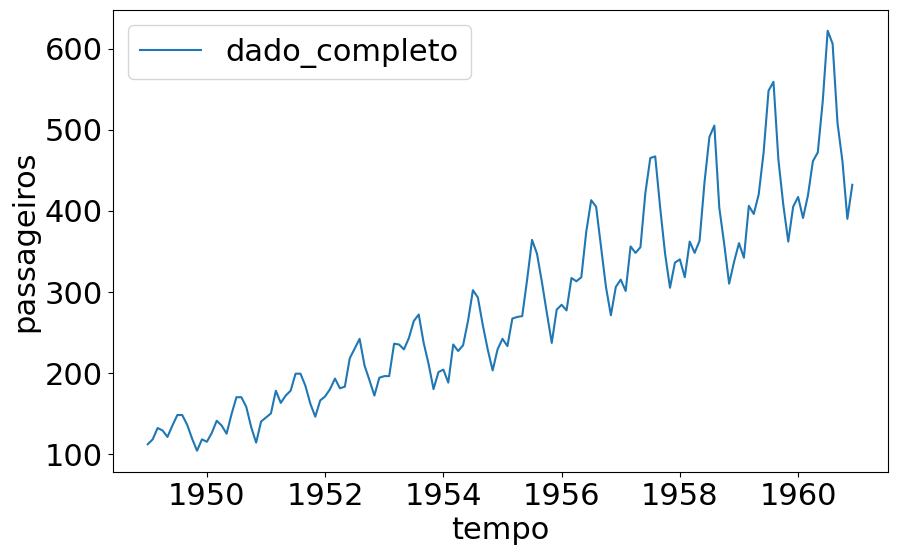

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [5]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [6]:
dado_escalado = sc.transform(passageiros)

In [7]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<Axes: xlabel='data', ylabel='passageiros'>

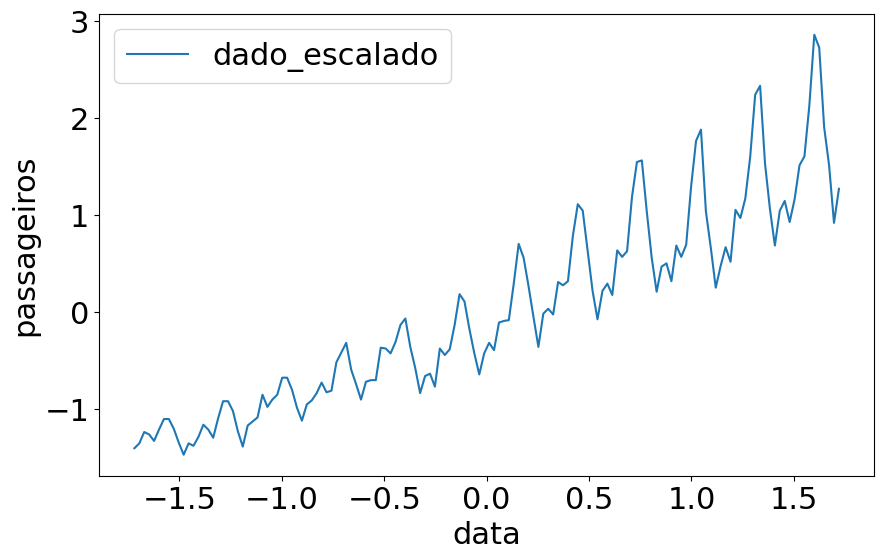

In [8]:
plt.xlabel('data')
plt.ylabel('passageiros')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [9]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [10]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [11]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

<Axes: xlabel='data', ylabel='passageiros'>

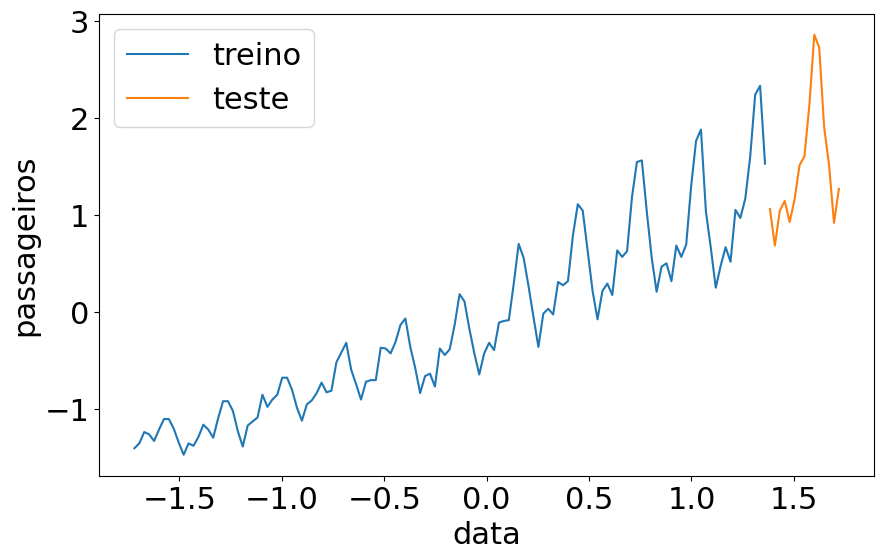

In [12]:
plt.xlabel('data')
plt.ylabel('passageiros')
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')

# 02.Regressão

$ z = Wx + b $

$ a(z) = Cz $

In [13]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-30 10:19:13.736328: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [14]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
regressor.fit(x_treino, y_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1343  


In [17]:
y_predict = regressor.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

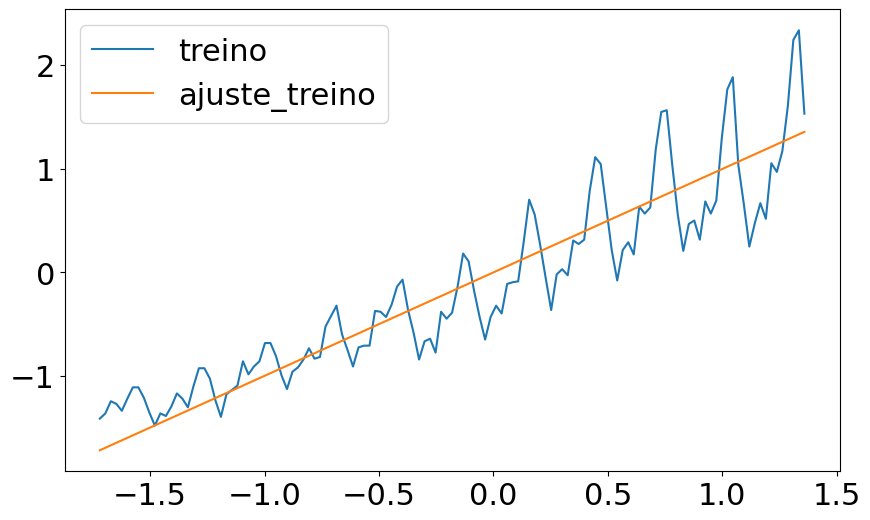

In [18]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')

In [19]:
d = {'tempo': x_treino, 'passageiros': y_predict[:,0]}

In [20]:
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.712531
1,-1.696007,-1.688579
2,-1.671950,-1.664628
3,-1.647894,-1.640676
4,-1.623837,-1.616725
...,...,...
124,1.262984,1.257452
125,1.287041,1.281404
126,1.311098,1.305356
127,1.335155,1.329307


In [21]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

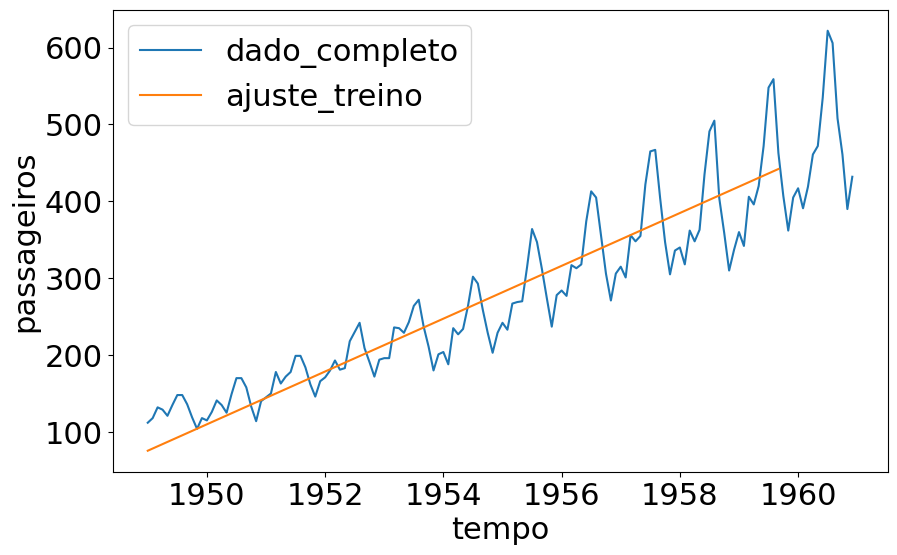

In [22]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [23]:
y_predict_teste = regressor.predict(x_teste)
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

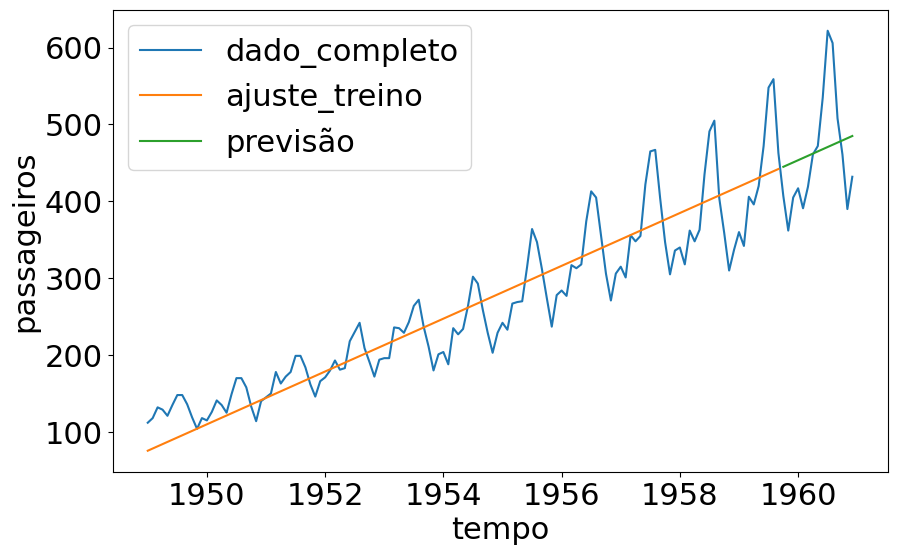

In [24]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [25]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 1.3000
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 1.1570
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 1.1256
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 1.2286
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 1.2476
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 1.1452
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 1.2269
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 1.1473
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 1.2515
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 1.1562
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 1.2051
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 1.1535
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 1.1657
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 1.2209
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 1.1043
Epoc

In [27]:
y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<Axes: >

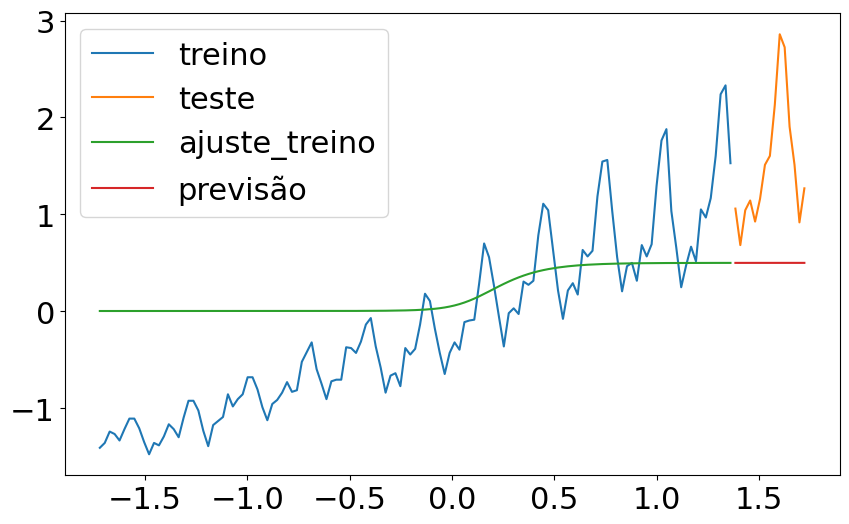

In [28]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label='previsão')

$\Huge \sigma(z) = \frac{1}{1+e^{-z}} $

## Atualização do pesos

No vídeo anterior utilizamos o otimizador Adam para ser responsável pela atualização dos pesos. Este algoritmo é exemplo de um método de gradiente descendente estocástico desenvolvido para ser computacionalmente eficiente.
[Neste texto](https://cursos.alura.com.br/course/rede-neural-numpy/task/57827) eu explico como um algoritmo de gradiente descendente simples funciona.

Em conjunto com o algoritmo de otimização precisamos utilizar uma função de custo que vai medir quanto a nossa estimativa é diferente do valor conhecido. O algoritmo de otimização busca minimizar o valor da função de custo. No problema estudado no curso estamos estimando o número de passageiros. Para minimizar a função de custo, o número de passageiros estimado deve ser o mais próximo possível do número de passageiros presentes nos dados de treino.

[Neste link](https://www.tensorflow.org/api_docs/python/tf/keras/losses) você encontra diferentes funções de custo presentes no Keras. A função de custo de erro médio quadrático é uma das que é adequada para problemas de regressão.

# 03.Reformulando o problema

In [29]:
vetor = pd.DataFrame(y_treino)[0]

In [30]:
def separa_dados(vetor: pd.DataFrame, n_passos: int):
    x_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i - n_passos: i - 1]))
        y_novo.append(vetor.loc[i])
    
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [31]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [32]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [33]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [34]:
vetor2 = pd.DataFrame(y_teste)[0]
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [35]:
regressor3 = Sequential([
    Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100


/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7591  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.7300
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.6809
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.7406
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.7243
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.7596
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.6942
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.6995
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.5508
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.5444
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.5493
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.4799
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.4941
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.4312
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.3918
Epoch 16/100
4/4

In [36]:
y_predict_novo = regressor3.predict(x_treino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


<Axes: xlabel='tempo', ylabel='0'>

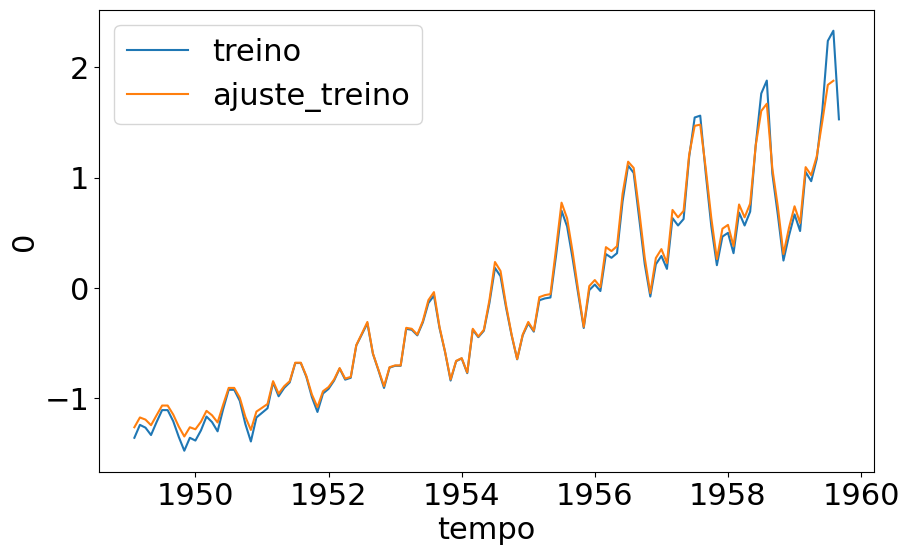

In [38]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [39]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


<Axes: xlabel='tempo', ylabel='0'>

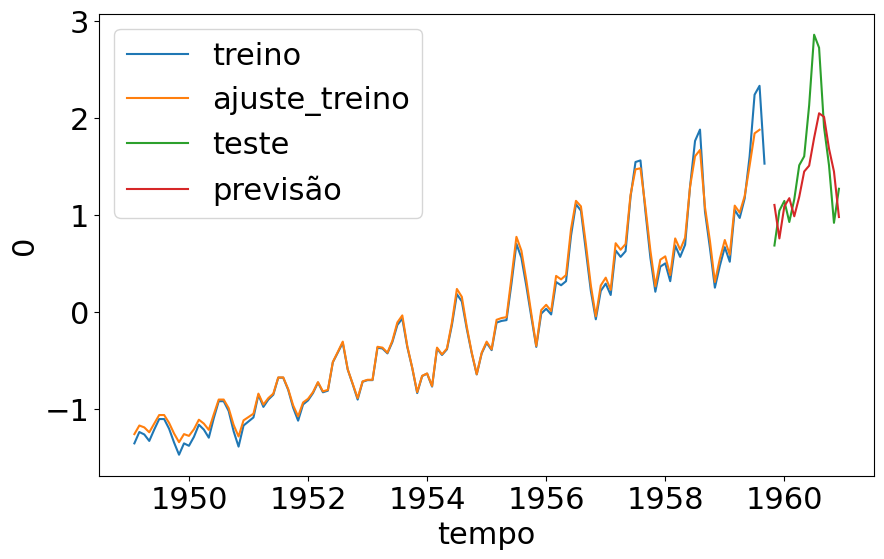

In [40]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_teste_novo)[0].values, data=passageiros[130:144], label='previsão')

In [41]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [42]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [43]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [44]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [45]:
regressor4 = Sequential([
    Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

regressor4.compile(loss='mean_squared_error', optimizer='adam')

regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

Epoch 1/300


/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.7262
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.6986
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.5337
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.6105
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.4837
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.3732
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.3759
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.3906
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.2727
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.2608
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.2023
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.1705
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.1799
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.1722
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.1502
Epoch 16/300
4/4

In [46]:
y_predict_novo = regressor4.predict(x_treino_novo)
y_predict_teste_novo = regressor4.predict(x_teste_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [47]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

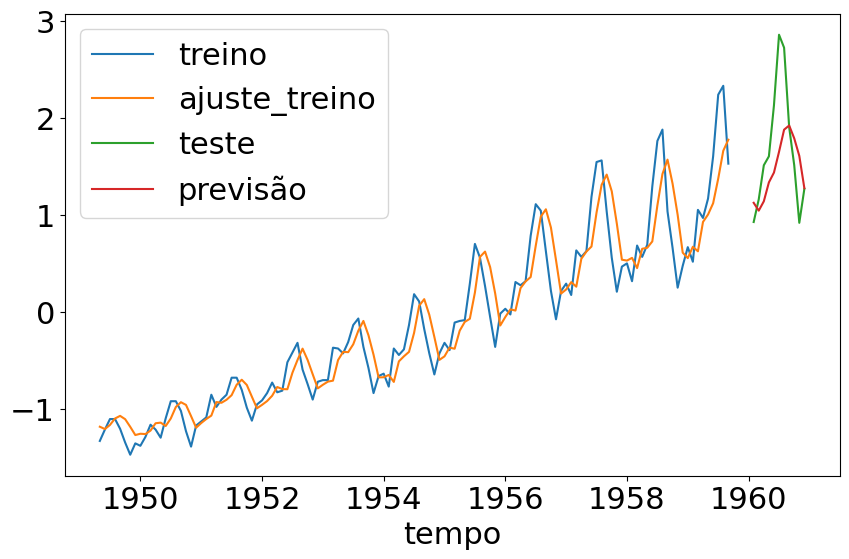

In [48]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

# 04.Redes recorrentes

In [49]:
bicicletas = pd.read_csv('bicicletas.csv')
bicicletas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [50]:
bicicletas['datas'] = pd.to_datetime(bicicletas['datas'])

<Axes: xlabel='datas', ylabel='contagem'>

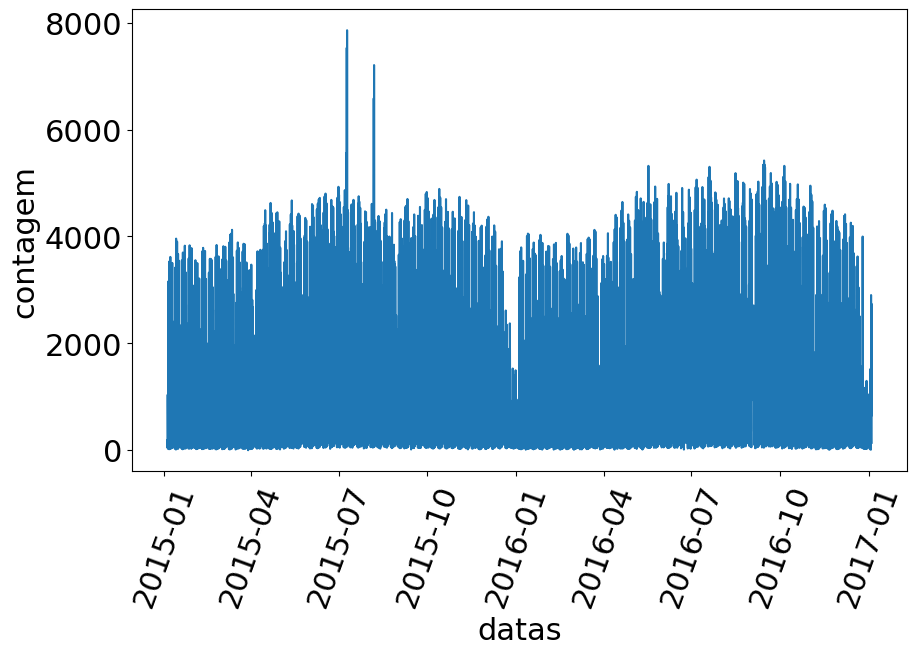

In [51]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y='contagem', data=bicicletas)

In [52]:
sc2 = StandardScaler()
sc2.fit(bicicletas['contagem'].values.reshape(-1,1))

StandardScaler()

In [53]:
y = sc2.transform(bicicletas['contagem'].values.reshape(-1,1))

In [54]:
tamanho_treino = int(len(bicicletas) * 0.9)
tamanho_teste = len(bicicletas) - tamanho_treino

In [55]:
y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino:len(bicicletas)]

<Axes: xlabel='datas'>

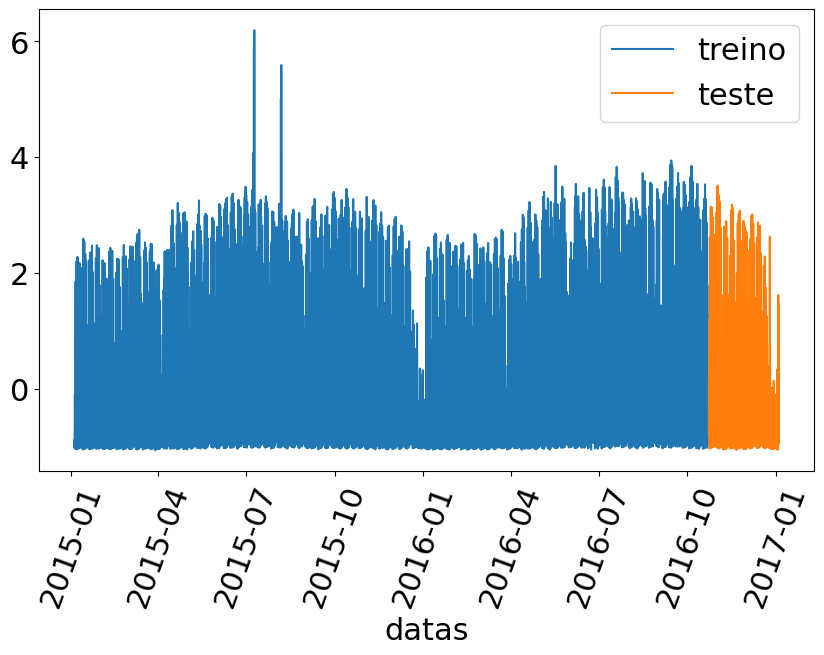

In [56]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_treino[:,0], data=bicicletas[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_teste[:,0], data=bicicletas[tamanho_treino:len(bicicletas)], label='teste')

In [57]:
vetor = pd.DataFrame(y_treino)[0]
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [58]:
vetor2 = pd.DataFrame(y_teste)[0]
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [59]:
x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0], x_treino_novo.shape[1], 1))
x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

In [60]:
recorrente = Sequential([
    LSTM(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])),
    Dense(units=1)
])

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente.summary()

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

#### LSTM = Long Short Term Memory

[O que é uma LSTM?](https://cursos.alura.com.br/course/deep-learning-previsao-keras/task/78455)

# 05.Avaliando o resultado

In [61]:
resultado = recorrente.fit(x_treino_novo, y_treino_novo,
                           validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4914 - val_loss: 0.1806
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0990 - val_loss: 0.0503
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0594 - val_loss: 0.0361
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0467 - val_loss: 0.0351
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0432 - val_loss: 0.0316
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0425 - val_loss: 0.0379
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0382 - val_loss: 0.0242
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0375 - val_loss: 0.0252
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0396 - val_loss: 0.0232
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0319 - val_loss: 0.0210
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0297 - val_loss: 0.0232
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━

In [62]:
y_ajustado = recorrente.predict(x_treino_novo)

490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: xlabel='datas'>

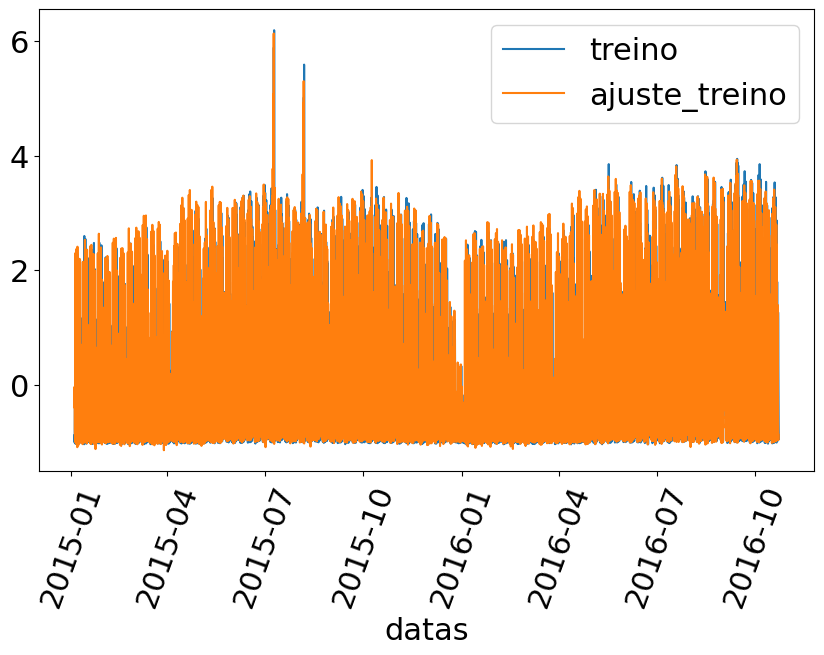

In [63]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_treino[:,0], data=bicicletas[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bicicletas[0:15662], label='ajuste_treino')

In [64]:
y_predito = recorrente.predict(x_teste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: xlabel='datas'>

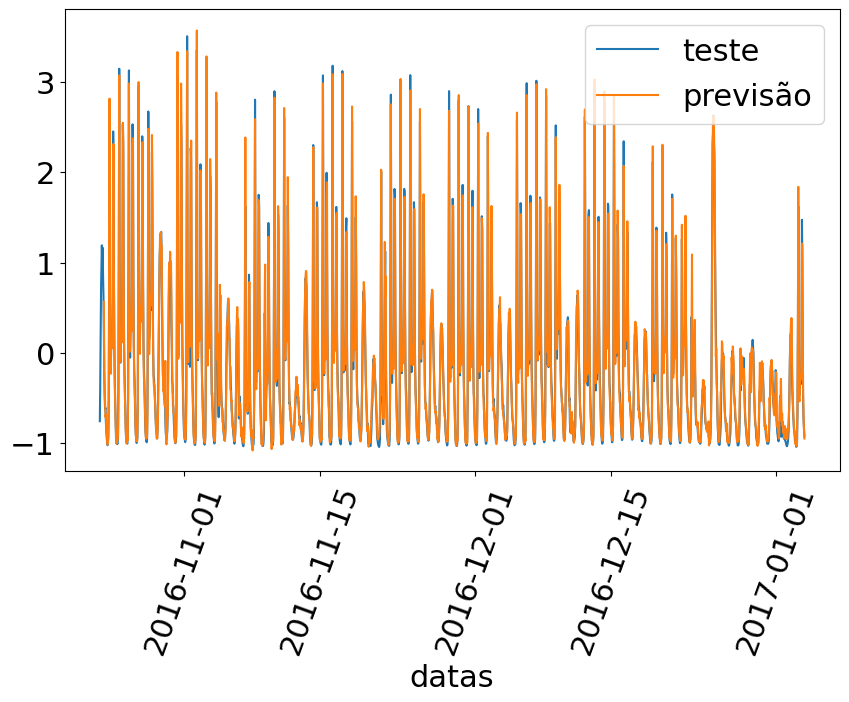

In [65]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_teste[:,0], data=bicicletas[tamanho_treino:len(bicicletas)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bicicletas[tamanho_treino + 10:len(bicicletas)], label='previsão')

In [67]:
recorrente_g = Sequential([
    GRU(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])),
    Dense(units=1)
])

recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

print(recorrente.summary())
print(recorrente_g.summary())

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,380 (521.02 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,691 (260.52 KB)

None


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
resultado2 = recorrente_g.fit(x_treino_novo, y_treino_novo,
                              validation_data=(x_teste_novo, y_teste_novo), epochs=100)

In [72]:
y_predito2 = recorrente_g.predict(x_teste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: xlabel='datas'>

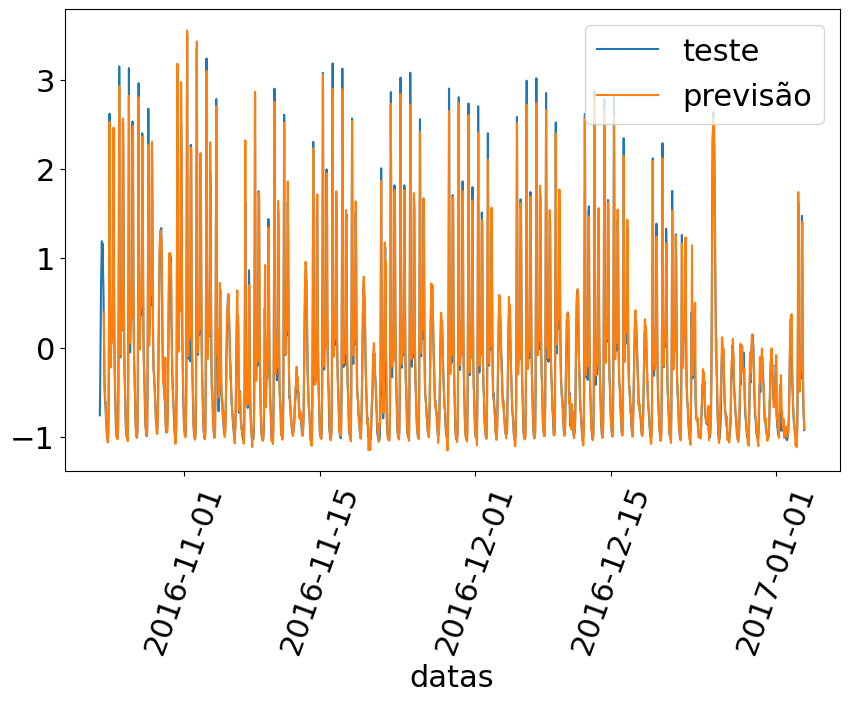

In [73]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_teste[:,0], data=bicicletas[tamanho_treino:len(bicicletas)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bicicletas[tamanho_treino + 10: len(bicicletas)], label='previsão')

In [74]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

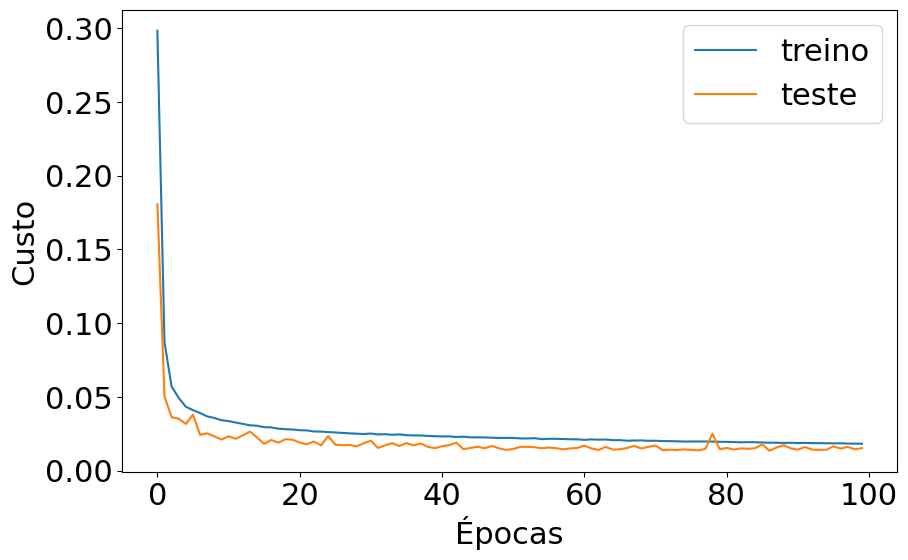

In [77]:
# LSTM
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

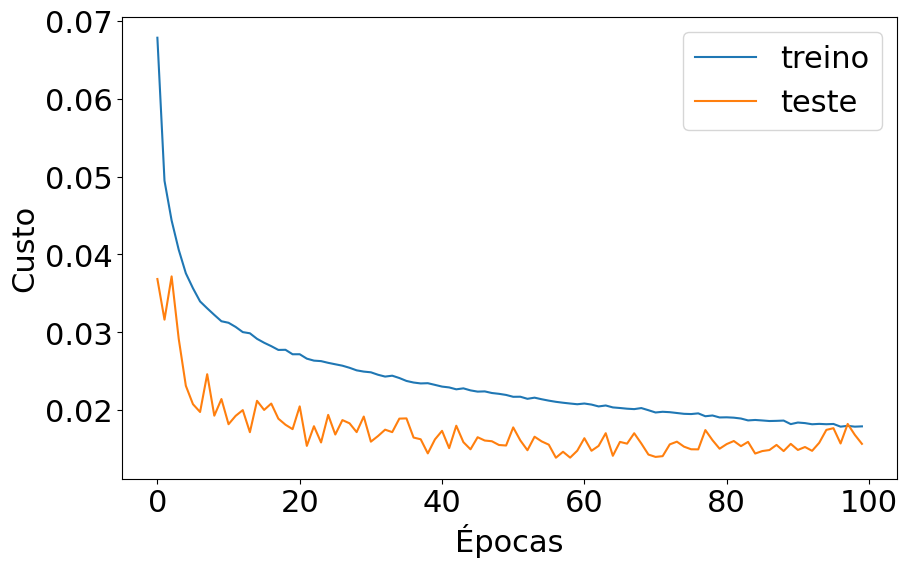

In [78]:
# GRU
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

## Para saber mais: Otimizador

Foi escolhido o RMSProp como otimizador dos pesos no treinamento da rede neural. O objetivo foi utilizar um otimizador _adaptivo_. Um otimizador adaptivo é capaz de controlar o gradiente e evitar que este cresça ou diminua muito. Entretanto, a escolha do RMSProp foi feita para chamar a atenção sobre o otimizador. Tanto o Adam quanto o RMSProp são adaptivos e seriam boas escolhas para a solução do problema.

Para verificar outros otimizadores disponíveis no Keras você pode consultar este [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).